In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_parquet("../data/data.parquet.gzip")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount
0,2018-07-21 18:59:21.102761,Latvia,2018-04-20,2018-04-17,0.0,4400.0
1,2018-07-21 18:50:02.050224,Peru,2018-04-20,2018-04-20,0.0,4400.0
2,2018-07-21 18:22:00.561856,Peru,2018-04-20,2018-04-16,1.0,2640.0
3,2018-07-21 19:00:35.451683,China,2018-04-20,2018-04-20,2.0,3080.0
4,2015-05-21 18:56:29.671213,Peru,2018-04-20,2018-04-19,0.0,4400.0


<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285570 entries, 0 to 285569
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       285570 non-null  object        
 1   country_code    285570 non-null  object        
 2   last_order_ts   285570 non-null  object        
 3   first_order_ts  285570 non-null  datetime64[ns]
 4   total_orders    285570 non-null  object        
 5   voucher_amount  283839 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 13.1+ MB


<IPython.core.display.Javascript object>

In [5]:
df["total_orders"] = pd.to_numeric(df.total_orders)

<IPython.core.display.Javascript object>

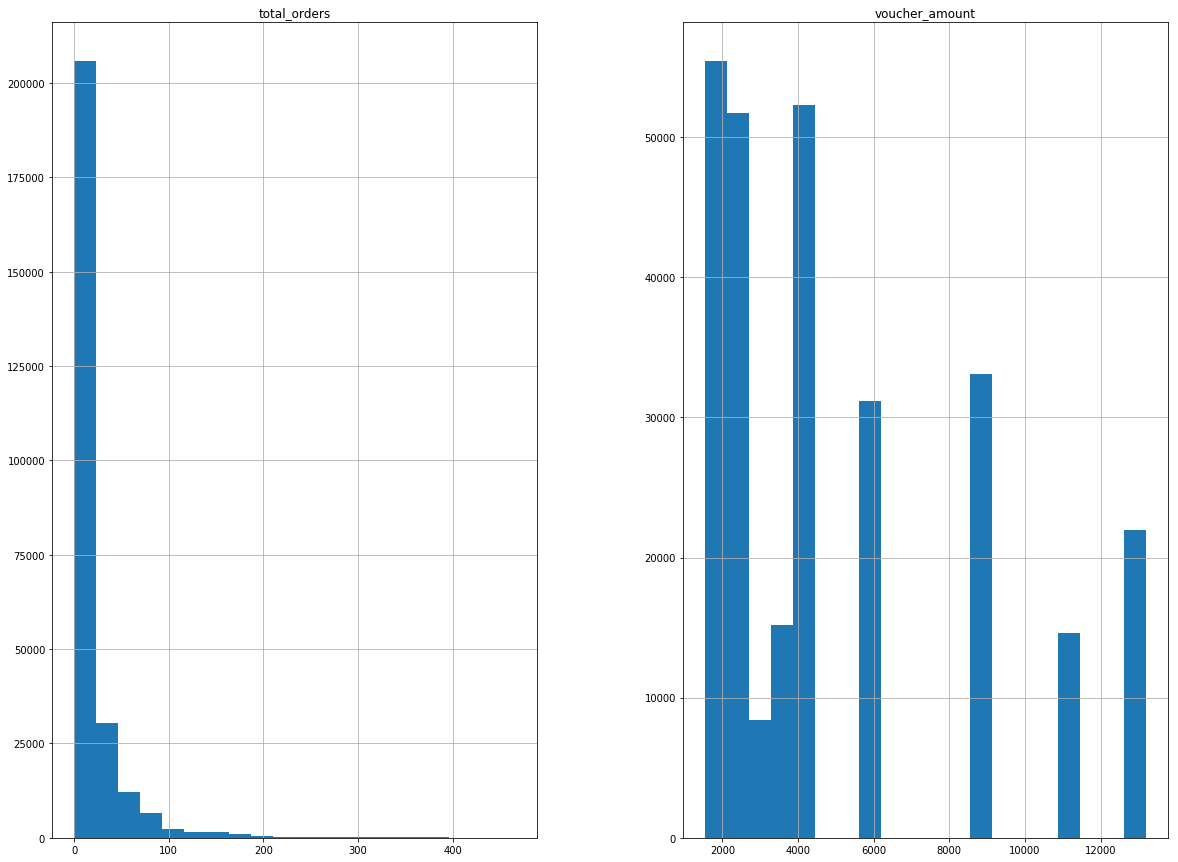

<IPython.core.display.Javascript object>

In [6]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [7]:
df.voucher_amount.value_counts()

1760.0     52285
4400.0     52272
8800.0     33123
5720.0     31189
2200.0     28670
2640.0     23040
13200.0    21968
3520.0     15160
11000.0    14607
3080.0      8387
1540.0      3138
Name: voucher_amount, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
df.corr()["voucher_amount"].sort_values(ascending=False)

voucher_amount    1.000000
total_orders     -0.016841
Name: voucher_amount, dtype: float64

<IPython.core.display.Javascript object>

### Create Fequent Segment

In [9]:
# bins = pd.IntervalIndex.from_tuples([(0, 4), (5, 13), (14, 37), (38, np.inf)])
bins = [0.0, 4.0, 13.0, 37.0, np.inf]
labels = ["0-4", "5-13", "13-37", "38-higher"]

<IPython.core.display.Javascript object>

In [10]:
df["total_orders_ranges"] = pd.cut(
    df["total_orders"], bins=bins, labels=labels, include_lowest=True
)

<IPython.core.display.Javascript object>

In [11]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,total_orders_ranges
0,2018-07-21 18:59:21.102761,Latvia,2018-04-20,2018-04-17,0.0,4400.0,0-4
1,2018-07-21 18:50:02.050224,Peru,2018-04-20,2018-04-20,0.0,4400.0,0-4
2,2018-07-21 18:22:00.561856,Peru,2018-04-20,2018-04-16,1.0,2640.0,0-4
3,2018-07-21 19:00:35.451683,China,2018-04-20,2018-04-20,2.0,3080.0,0-4
4,2015-05-21 18:56:29.671213,Peru,2018-04-20,2018-04-19,0.0,4400.0,0-4


<IPython.core.display.Javascript object>

In [12]:
one_hot_freq_segment = pd.get_dummies(df["total_orders_ranges"], prefix="freq")

<IPython.core.display.Javascript object>

In [13]:
df = df.drop("total_orders_ranges", axis=1)

<IPython.core.display.Javascript object>

In [14]:
df = df.join(one_hot_freq_segment)

<IPython.core.display.Javascript object>

In [15]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher
0,2018-07-21 18:59:21.102761,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0
1,2018-07-21 18:50:02.050224,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0
2,2018-07-21 18:22:00.561856,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0
3,2018-07-21 19:00:35.451683,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0
4,2015-05-21 18:56:29.671213,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0


<IPython.core.display.Javascript object>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285570 entries, 0 to 285569
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       285570 non-null  object        
 1   country_code    285570 non-null  object        
 2   last_order_ts   285570 non-null  object        
 3   first_order_ts  285570 non-null  datetime64[ns]
 4   total_orders    262725 non-null  float64       
 5   voucher_amount  283839 non-null  float64       
 6   freq_0-4        285570 non-null  uint8         
 7   freq_5-13       285570 non-null  uint8         
 8   freq_13-37      285570 non-null  uint8         
 9   freq_38-higher  285570 non-null  uint8         
dtypes: datetime64[ns](1), float64(2), object(3), uint8(4)
memory usage: 14.2+ MB


<IPython.core.display.Javascript object>

In [17]:
df.corr()["voucher_amount"].sort_values(ascending=False)

voucher_amount    1.000000
freq_0-4          0.023263
freq_5-13        -0.008318
freq_13-37       -0.010647
freq_38-higher   -0.014971
total_orders     -0.016841
Name: voucher_amount, dtype: float64

<IPython.core.display.Javascript object>

### Convert timestamp to datetime

In [18]:
df["timestamp"] = pd.to_datetime(df["timestamp"] ,format='%Y-%m-%d').dt.date
df["last_order_ts"] = pd.to_datetime(df["last_order_ts"], format='%Y-%m-%d')


<IPython.core.display.Javascript object>

In [32]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0
4,2015-05-21,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0


<IPython.core.display.Javascript object>

In [33]:
# It's improbable that the timestamp of the event is before the first or last order.
# In this case change the event timestamp to max of time stamp as it is a safe assumption,
# as the customer might be given the voucher as he hasn't returned back in some time.

# df[(df.timestamp < df.last_order_ts) | (df.timestamp < df.first_order_ts)][
#     "timestamp"
# ] = df.timestamp.max()

df.loc[
    (df.timestamp < df.last_order_ts) | (df.timestamp < df.first_order_ts), "timestamp"
] = df.timestamp.max()

<IPython.core.display.Javascript object>

In [34]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0
4,2018-07-31,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0


<IPython.core.display.Javascript object>

In [40]:
df["timestamp"] = pd.to_datetime(df["timestamp"])


<IPython.core.display.Javascript object>

### Create recency_segment_ranges

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285570 entries, 0 to 285569
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       285570 non-null  datetime64[ns]
 1   country_code    285570 non-null  object        
 2   last_order_ts   285570 non-null  datetime64[ns]
 3   first_order_ts  285570 non-null  datetime64[ns]
 4   total_orders    262725 non-null  float64       
 5   voucher_amount  283839 non-null  float64       
 6   freq_0-4        285570 non-null  uint8         
 7   freq_5-13       285570 non-null  uint8         
 8   freq_13-37      285570 non-null  uint8         
 9   freq_38-higher  285570 non-null  uint8         
dtypes: datetime64[ns](3), float64(2), object(1), uint8(4)
memory usage: 14.2+ MB


<IPython.core.display.Javascript object>

In [42]:
df["days_since_last_order"] = (df["timestamp"] - df["last_order_ts"]).dt.days

<IPython.core.display.Javascript object>

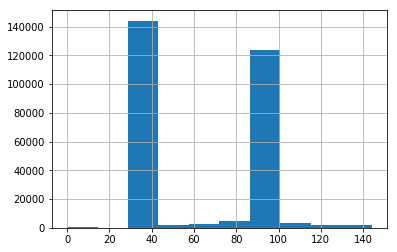

<IPython.core.display.Javascript object>

In [43]:
df["days_since_last_order"].hist()

#### Use median values in case of improbable last_order_ts

median_value = df.days_since_last_order.median()

df.loc[df["days_since_last_order"] < 0, "days_since_last_order"] = median_value

### Create Recency Segment

In [44]:
bins = [0.0, 30, 60, 90, 120, 180, np.inf]
labels = ["0-30", "30-60", "60-90", "90-120", "120-180", "180+"]

<IPython.core.display.Javascript object>

In [45]:
df["recency_segment_ranges"] = pd.cut(
    df["days_since_last_order"], bins=bins, labels=labels, include_lowest=True
)

<IPython.core.display.Javascript object>

In [46]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher,days_since_last_order,recency_segment_ranges
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0,92,90-120
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0,92,90-120
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0,92,90-120
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0,92,90-120
4,2018-07-31,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0,102,90-120


<IPython.core.display.Javascript object>

In [47]:
one_hot_rec_segment = pd.get_dummies(df["recency_segment_ranges"], prefix="rec_segment")

<IPython.core.display.Javascript object>

In [48]:
df = df.join(one_hot_rec_segment)

<IPython.core.display.Javascript object>

In [49]:
df.isna().sum()

timestamp                     0
country_code                  0
last_order_ts                 0
first_order_ts                0
total_orders              22845
voucher_amount             1731
freq_0-4                      0
freq_5-13                     0
freq_13-37                    0
freq_38-higher                0
days_since_last_order         0
recency_segment_ranges        0
rec_segment_0-30              0
rec_segment_30-60             0
rec_segment_60-90             0
rec_segment_90-120            0
rec_segment_120-180           0
rec_segment_180+              0
dtype: int64

<IPython.core.display.Javascript object>

In [50]:
df = df.dropna(how="any")

<IPython.core.display.Javascript object>

In [51]:
df.isna().sum()

timestamp                 0
country_code              0
last_order_ts             0
first_order_ts            0
total_orders              0
voucher_amount            0
freq_0-4                  0
freq_5-13                 0
freq_13-37                0
freq_38-higher            0
days_since_last_order     0
recency_segment_ranges    0
rec_segment_0-30          0
rec_segment_30-60         0
rec_segment_60-90         0
rec_segment_90-120        0
rec_segment_120-180       0
rec_segment_180+          0
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
df = df.drop("recency_segment_ranges", axis=1)

<IPython.core.display.Javascript object>

In [57]:
df.corr()["voucher_amount"].sort_values(ascending=False)

voucher_amount           1.000000
rec_segment_90-120       0.125608
days_since_last_order    0.124676
freq_0-4                 0.025818
rec_segment_120-180      0.017446
rec_segment_0-30        -0.000326
freq_5-13               -0.008246
freq_13-37              -0.010767
rec_segment_60-90       -0.014709
freq_38-higher          -0.015349
total_orders            -0.016841
rec_segment_30-60       -0.124154
rec_segment_180+              NaN
Name: voucher_amount, dtype: float64

<IPython.core.display.Javascript object>

### Customer customer since ranges

In [58]:
df["customer_since_days"] = (df["timestamp"] - df["first_order_ts"]).dt.days

<IPython.core.display.Javascript object>

In [59]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher,days_since_last_order,rec_segment_0-30,rec_segment_30-60,rec_segment_60-90,rec_segment_90-120,rec_segment_120-180,rec_segment_180+,customer_since_days
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0,92,0,0,0,1,0,0,95
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0,92,0,0,0,1,0,0,92
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0,92,0,0,0,1,0,0,96
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0,92,0,0,0,1,0,0,92
4,2018-07-31,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0,102,0,0,0,1,0,0,103


<IPython.core.display.Javascript object>

df.loc[
    df["customer_since_days"] < 0, "customer_since_days"
] = df.customer_since_days.median()

In [61]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher,days_since_last_order,rec_segment_0-30,rec_segment_30-60,rec_segment_60-90,rec_segment_90-120,rec_segment_120-180,rec_segment_180+,customer_since_days
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0,92,0,0,0,1,0,0,95
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0,92,0,0,0,1,0,0,92
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0,92,0,0,0,1,0,0,96
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0,92,0,0,0,1,0,0,92
4,2018-07-31,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0,102,0,0,0,1,0,0,103


<IPython.core.display.Javascript object>

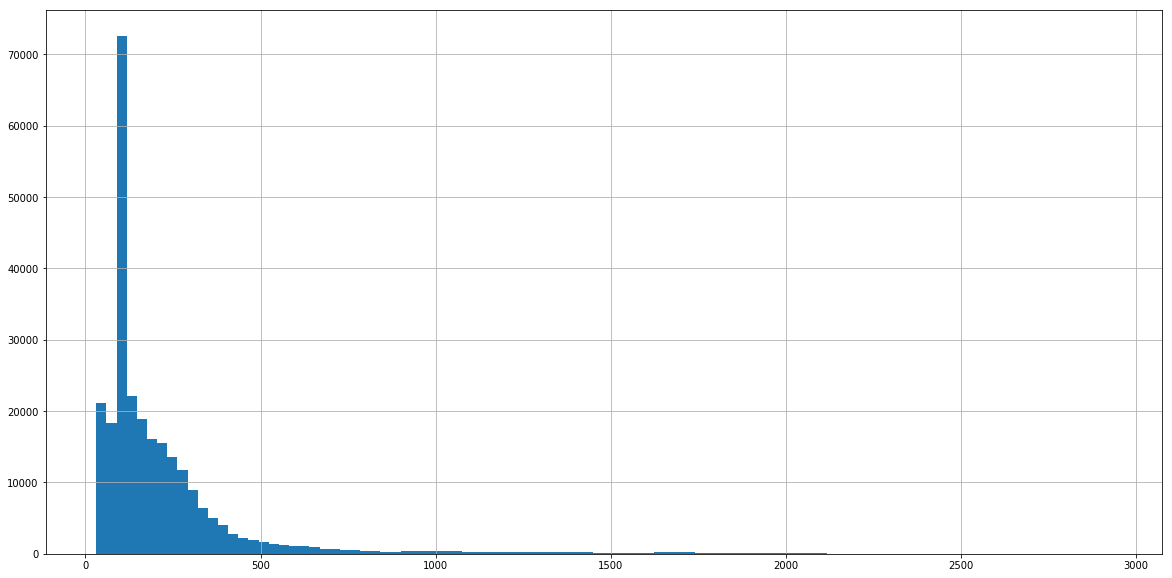

<IPython.core.display.Javascript object>

In [62]:
df.customer_since_days.hist(bins=100, figsize=(20, 10))

In [63]:
df.customer_since_days.value_counts()

92      34790
93       2949
94       2523
31       2339
95       2178
        ...  
2315        1
2509        1
2059        1
1997        1
2122        1
Name: customer_since_days, Length: 2216, dtype: int64

<IPython.core.display.Javascript object>

In [64]:
bins = [0.0, 60, 120, 180, 240, 300, np.inf]
labels = ["0-60", "60-120", "120-180", "180-240", "240-300", "300+"]

<IPython.core.display.Javascript object>

In [65]:
df["customer_since_ranges"] = pd.cut(
    df["customer_since_days"], bins=bins, labels=labels, include_lowest=True
)

<IPython.core.display.Javascript object>

In [66]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher,days_since_last_order,rec_segment_0-30,rec_segment_30-60,rec_segment_60-90,rec_segment_90-120,rec_segment_120-180,rec_segment_180+,customer_since_days,customer_since_ranges
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0,92,0,0,0,1,0,0,95,60-120
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0,92,0,0,0,1,0,0,92,60-120
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0,92,0,0,0,1,0,0,96,60-120
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0,92,0,0,0,1,0,0,92,60-120
4,2018-07-31,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0,102,0,0,0,1,0,0,103,60-120


<IPython.core.display.Javascript object>

In [67]:
one_hot_cust_since = pd.get_dummies(df["customer_since_ranges"], prefix="cust_since")

<IPython.core.display.Javascript object>

In [68]:
df = df.join(one_hot_cust_since)

<IPython.core.display.Javascript object>

In [69]:
df = df.drop("customer_since_ranges", axis=1)

<IPython.core.display.Javascript object>

In [70]:
df.head()

,timestamp,country_code,last_order_ts,first_order_ts,total_orders,voucher_amount,freq_0-4,freq_5-13,freq_13-37,freq_38-higher,...,rec_segment_90-120,rec_segment_120-180,rec_segment_180+,customer_since_days,cust_since_0-60,cust_since_60-120,cust_since_120-180,cust_since_180-240,cust_since_240-300,cust_since_300+
0,2018-07-21,Latvia,2018-04-20,2018-04-17,0.0,4400.0,1,0,0,0,...,1,0,0,95,0,1,0,0,0,0
1,2018-07-21,Peru,2018-04-20,2018-04-20,0.0,4400.0,1,0,0,0,...,1,0,0,92,0,1,0,0,0,0
2,2018-07-21,Peru,2018-04-20,2018-04-16,1.0,2640.0,1,0,0,0,...,1,0,0,96,0,1,0,0,0,0
3,2018-07-21,China,2018-04-20,2018-04-20,2.0,3080.0,1,0,0,0,...,1,0,0,92,0,1,0,0,0,0
4,2018-07-31,Peru,2018-04-20,2018-04-19,0.0,4400.0,1,0,0,0,...,1,0,0,103,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [71]:
df.corr()["voucher_amount"].sort_values(ascending=False)

voucher_amount           1.000000
rec_segment_90-120       0.125608
days_since_last_order    0.124676
cust_since_60-120        0.056479
freq_0-4                 0.025818
rec_segment_120-180      0.017446
cust_since_180-240       0.011408
cust_since_240-300       0.000168
rec_segment_0-30        -0.000326
freq_5-13               -0.008246
customer_since_days     -0.009171
freq_13-37              -0.010767
cust_since_120-180      -0.011975
rec_segment_60-90       -0.014709
freq_38-higher          -0.015349
total_orders            -0.016841
cust_since_300+         -0.021186
cust_since_0-60         -0.066436
rec_segment_30-60       -0.124154
rec_segment_180+              NaN
Name: voucher_amount, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
df_peru = df[df.country_code == "Peru"]

In [ ]:
df_peru.head()

In [ ]:
df_peru.corr()["voucher_amount"].sort_values(ascending=False)

In [ ]:
df_peru.info()

In [ ]:
df_peru["rec_segment_30-60"].value_counts()